In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn import ensemble
from sklearn.cross_validation import KFold
import StringIO
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### hi kurt

### hi kendrick
regcompact = pd.read_csv("RegularSeasonCompactResults.csv")
regdetailed = pd.read_csv("RegularSeasonDetailedResults.csv")
seasons = pd.read_csv("Seasons.csv")
teams = pd.read_csv("Teams.csv")
tourneycompact = pd.read_csv("TourneyCompactResults.csv")
tourneydetailed = pd.read_csv("TourneyDetailedResults.csv")
tourneyseeds = pd.read_csv("TourneySeeds.csv")
tourneyslots = pd.read_csv("TourneySlots.csv")



In [4]:
print regcompact.head(n=5)

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0    1985      20   1228      81   1328      64    N      0
1    1985      25   1106      77   1354      70    H      0
2    1985      25   1112      63   1223      56    H      0
3    1985      25   1165      70   1432      54    H      0
4    1985      25   1192      86   1447      74    H      0


In [5]:
regcompact['WteamID'] = regcompact['Wteam'].map(str) + regcompact['Season'].map(str)
regcompact['LteamID'] = regcompact['Lteam'].map(str) + regcompact['Season'].map(str)

In [6]:
print teams.head(n=5)

   Team_Id    Team_Name
0     1101  Abilene Chr
1     1102    Air Force
2     1103        Akron
3     1104      Alabama
4     1105  Alabama A&M


In [7]:
team_names = [''] * len(regcompact)

for i in range(0,len(regcompact)):

     team_names[i] = teams['Team_Name'].ix[teams['Team_Id']==regcompact.ix[i,'Wteam']].values[0]
        


In [8]:
team_names = pd.Series(team_names)
regcompact = pd.concat([regcompact,team_names],axis=1)

regcompact=regcompact.rename(columns = {'0':'WteamName'})


In [9]:
team_names = [''] * len(regcompact)

for i in range(0,len(regcompact)):

     team_names[i] = teams['Team_Name'].ix[teams['Team_Id']==regcompact.ix[i,'Lteam']].values[0]

In [10]:
team_names = pd.Series(team_names)
regcompact = pd.concat([regcompact,team_names],axis=1)

regcompact=regcompact.rename(columns = {'0':'LteamName'})

In [11]:
tourneycompact['WteamID'] = tourneycompact['Wteam'].map(str) + tourneycompact['Season'].map(str)
tourneycompact['LteamID'] = tourneycompact['Lteam'].map(str) + tourneycompact['Season'].map(str)



In [12]:
tourneyseeds['Team_Id'] = tourneyseeds['Team'].map(str) + tourneyseeds['Season'].map(str)

In [13]:
for i in range(0,len(regcompact)):

    tourneycompact.ix[i,'WSeed'] = tourneyseeds['Seed'].ix[tourneyseeds['Team_Id']==tourneycompact.ix[i,'WteamID']].values[0]
        

       



KeyError: 1983

In [14]:
for i in range(0,len(regcompact)):
    
    tourneycompact.ix[i,'LSeed'] = tourneyseeds['Seed'].ix[tourneyseeds['Team_Id']==tourneycompact.ix[i,'LteamID']].values[0]

KeyError: 1983

In [15]:
print tourneycompact.head(n=5)

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot   WteamID  \
0    1985     136   1116      63   1234      54    N      0  11161985   
1    1985     136   1120      59   1345      58    N      0  11201985   
2    1985     136   1207      68   1250      43    N      0  12071985   
3    1985     136   1229      58   1425      55    N      0  12291985   
4    1985     136   1242      49   1325      38    N      0  12421985   

    LteamID WSeed LSeed  
0  12341985   X09   X08  
1  13451985   Z11   Z06  
2  12501985   W01   W16  
3  14251985   Y09   Y08  
4  13251985   Z03   Z14  


In [16]:
teams.head(n=5)

,Team_Id,Team_Name
0,1101,Abilene Chr
1,1102,Air Force
2,1103,Akron
3,1104,Alabama
4,1105,Alabama A&M


In [17]:
for i in range(0,len(regcompact)):
    
    tourneycompact.ix[i,"WteamName"] = teams['Team_Name'].ix[teams['Team_Id']==tourneycompact.ix[i,'Wteam']].values[0]
    
    



KeyError: 1983

In [18]:
for i in range(0,len(regcompact)):
    
    tourneycompact.ix[i,"LteamName"] = teams['Team_Name'].ix[teams['Team_Id']==tourneycompact.ix[i,'Lteam']].values[0]
    
    



KeyError: 1983

In [19]:
print tourneycompact.head(n=5)

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot   WteamID  \
0    1985     136   1116      63   1234      54    N      0  11161985   
1    1985     136   1120      59   1345      58    N      0  11201985   
2    1985     136   1207      68   1250      43    N      0  12071985   
3    1985     136   1229      58   1425      55    N      0  12291985   
4    1985     136   1242      49   1325      38    N      0  12421985   

    LteamID WSeed LSeed    WteamName LteamName  
0  12341985   X09   X08     Arkansas      Iowa  
1  13451985   Z11   Z06       Auburn    Purdue  
2  12501985   W01   W16   Georgetown    Lehigh  
3  14251985   Y09   Y08  Illinois St       USC  
4  13251985   Z03   Z14       Kansas      Ohio  


In [20]:
for i in range(0,len(tourneycompact)):
    if (len(tourneycompact.ix[i,"WSeed"])==3):
        tourneycompact.ix[i,"WSeedNum"] = int(tourneycompact.ix[i,"WSeed"][-2:])
    else: 
        tourneycompact.ix[i,"WSeedNum"] = int(tourneycompact.ix[i,"WSeed"][1:3])
    if (len(tourneycompact.ix[i,"LSeed"])==3):
        tourneycompact.ix[i,"LSeedNum"] = int(tourneycompact.ix[i,"LSeed"][-2:])
    else: 
        tourneycompact.ix[i,"LSeedNum"] = int(tourneycompact.ix[i,"LSeed"][1:3])

In [21]:
print tourneycompact.head(n=5)

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot   WteamID  \
0    1985     136   1116      63   1234      54    N      0  11161985   
1    1985     136   1120      59   1345      58    N      0  11201985   
2    1985     136   1207      68   1250      43    N      0  12071985   
3    1985     136   1229      58   1425      55    N      0  12291985   
4    1985     136   1242      49   1325      38    N      0  12421985   

    LteamID WSeed LSeed    WteamName LteamName  WSeedNum  LSeedNum  
0  12341985   X09   X08     Arkansas      Iowa       9.0       8.0  
1  13451985   Z11   Z06       Auburn    Purdue      11.0       6.0  
2  12501985   W01   W16   Georgetown    Lehigh       1.0      16.0  
3  14251985   Y09   Y08  Illinois St       USC       9.0       8.0  
4  13251985   Z03   Z14       Kansas      Ohio       3.0      14.0  


In [22]:
for i in range(0,len(tourneycompact)):
    if (tourneycompact.ix[i,"WSeed"][0:3]==tourneycompact.ix[i,"LSeed"][0:3]):
        tourneycompact.ix[i,"Play-In"] = 1
    else:
        tourneycompact.ix[i,"Play-In"] = 0 
    

In [23]:
tourneycompact = tourneycompact[tourneycompact["Play-In"]==0]

print tourneycompact.head(n=5)

   Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot   WteamID  \
0    1985     136   1116      63   1234      54    N      0  11161985   
1    1985     136   1120      59   1345      58    N      0  11201985   
2    1985     136   1207      68   1250      43    N      0  12071985   
3    1985     136   1229      58   1425      55    N      0  12291985   
4    1985     136   1242      49   1325      38    N      0  12421985   

    LteamID WSeed LSeed    WteamName LteamName  WSeedNum  LSeedNum  Play-In  
0  12341985   X09   X08     Arkansas      Iowa       9.0       8.0      0.0  
1  13451985   Z11   Z06       Auburn    Purdue      11.0       6.0      0.0  
2  12501985   W01   W16   Georgetown    Lehigh       1.0      16.0      0.0  
3  14251985   Y09   Y08  Illinois St       USC       9.0       8.0      0.0  
4  13251985   Z03   Z14       Kansas      Ohio       3.0      14.0      0.0  


In [24]:
average_wins_by_seed = [0] * 16

for i in range(1,17):
     average_wins_by_seed[i-1] = float(np.sum(tourneycompact["WSeedNum"]==(i)))/(4*(np.max(tourneycompact["Season"])-np.min(tourneycompact["Season"])))

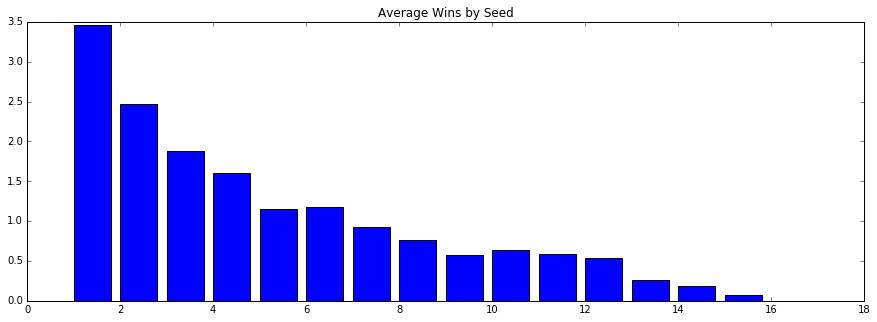

In [25]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)

ax.bar(range(1,17), average_wins_by_seed)
ax.set_title("Average Wins by Seed")


In [33]:
wins_by_1_seed = [0] * 31

one_seed = tourneycompact.ix[tourneycompact["WSeedNum"]==1]

for i in range(0,31):
    wins_by_1_seed[i] = len(one_seed.ix[one_seed["Season"]==i+1985]) 
    
    
wins_by_2_seed = [0] * 31

two_seed = tourneycompact.ix[tourneycompact["WSeedNum"]==2]

for i in range(0,31):
    wins_by_2_seed[i] = len(two_seed.ix[two_seed["Season"]==i+1985]) 
    
wins_by_3_seed = [0] * 31

three_seed = tourneycompact.ix[tourneycompact["WSeedNum"]==3]

for i in range(0,31):
    wins_by_3_seed[i] = len(three_seed.ix[three_seed["Season"]==i+1985]) 
    

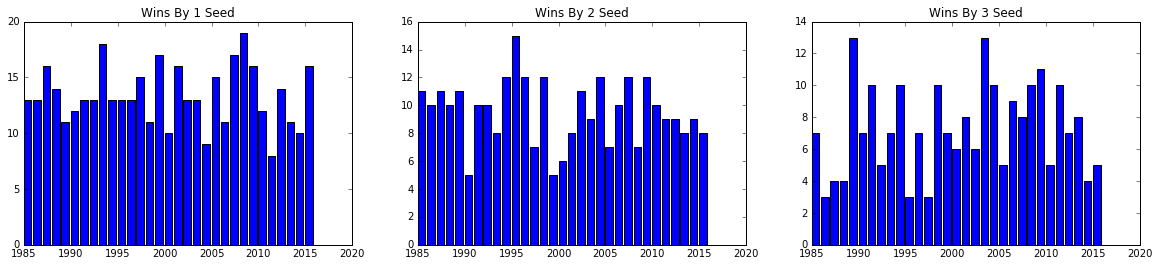

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

ax[0].bar(range(1985,2016), wins_by_1_seed)
ax[0].set_title("Wins By 1 Seed")

ax[1].bar(range(1985,2016), wins_by_2_seed)
ax[1].set_title("Wins By 2 Seed")

ax[2].bar(range(1985,2016), wins_by_3_seed)
ax[2].set_title("Wins By 3 Seed")



In [37]:
wins_by_low_seed = [0] * 31

low_seed = tourneycompact.ix[tourneycompact["WSeedNum"]<9]

for i in range(0,31):
    wins_by_low_seed[i] = len(low_seed.ix[low_seed["Season"]==i+1985]) 
    
wins_by_high_seed = [0] * 31

high_seed = tourneycompact.ix[tourneycompact["WSeedNum"]>8]

for i in range(0,31):
    wins_by_high_seed[i] = len(high_seed.ix[high_seed["Season"]==i+1985]) 
    
total_wins 
    

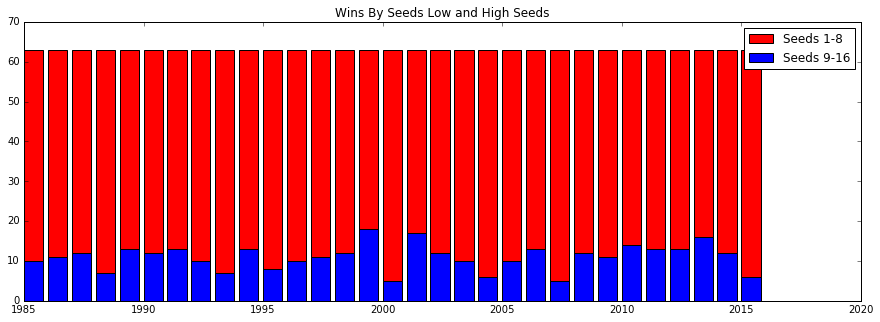

In [44]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(111)

b = ax.bar(range(1985,2016), [63] * 31, color = "r")
c = ax.bar(range(1985,2016), wins_by_high_seed, color = "b")
ax.set_title("Wins By Seeds Low and High Seeds")
ax.legend([b,c], ['Seeds 1-8', 'Seeds 9-16'])